# Forecast of 10 Year Treasury Notes (2002-2021)

#### <font color='darkblue'>__1. Data and libaries import__</font> [(→ Link)](#data_import)
#### <font color='darkblue'>__2. Prediction with Regression models filter method__</font> [(→ Link)](#regression_fm)
##### <font color='black'>2.1 Create Train & Test set
##### <font color='black'>2.2 Decision Tree
2.2.1 Feature Importance<br>
##### <font color='black'>2.3 Random Forest
2.3.1 Feature Importance<br>
##### <font color='black'>2.4 Pipeline
#### <font color='darkblue'>__3. Prediction with Regression model all features__</font> [(→ Link)](#regression_all)
##### <font color='black'>3.1 Create Train & Test set
##### <font color='black'>3.2 XGBoost
3.2.1 Feature Importance<br>
##### <font color='black'>3.3 Pipeline
<br>

## <a id='data_import'></a>
## 1. Data and libaries import

In [1]:
# Loading libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm
import warnings  
import pydotplus
import pydot
import xgboost as xgb
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
from matplotlib import rcParams
from matplotlib import pyplot
from functools import reduce
from IPython.display import Image  
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
# Import data and create dataframe
df_forecast = pd.read_excel('Prediction_Data_2002-2021.xlsx', index_col=0)
df_forecast

,Yield of the ten-year Treasury Notes,Real Risk Premium,Inflation Risk Premium,National Activity Index,Consumer Sentiment,Labor Force Participation,Unemploymentrate,Borrowings from FED,Reserves Depository Institutions,M2,...,10-Year Expected Inflation,Velocity of M2,GDP,Real GDP,Federal Debt,quarterly_mean,half_year_mean,annual_mean,annual_quarterly_mean,annual_half_mean
Date,,,,,,,,,,,,,,,,,,,,,
2002-12-01,4.03,1.264753,0.460523,-0.59,86.7,66.3,6.0,0.0797,40.3,5772.0,...,2.327409,1.919000,3.666667,13596.096333,6.442420e+06,0.985732,1.025641,1.144127,1.160688,1.115524
2003-01-01,4.05,1.196914,0.386633,0.35,82.4,66.4,5.8,0.0269,42.9,5804.6,...,2.243939,1.915000,4.100000,13619.434000,6.460776e+06,0.991975,0.995885,1.118107,1.127152,1.122727
2003-02-01,3.90,1.177252,0.373463,-0.46,79.9,66.4,5.9,0.0252,41.9,5840.7,...,2.245564,1.910333,4.433333,13659.991667,6.530558e+06,1.027564,1.018803,1.139530,1.108962,1.118498
2003-03-01,3.81,1.151881,0.369566,-0.19,77.6,66.3,5.9,0.0217,40.6,5861.4,...,2.078386,1.905667,4.766667,13700.549333,6.600339e+06,1.036089,1.040245,1.134296,1.094786,1.090412
2003-04-01,3.96,1.192092,0.385485,-0.65,86.0,66.4,6.0,0.0294,41.2,5898.8,...,2.116690,1.901000,5.100000,13741.107000,6.670121e+06,0.992424,1.001684,1.065025,1.073155,1.063235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01,1.52,1.146639,0.334032,0.20,85.5,61.6,5.9,87.7460,3848.1,20458.9,...,1.596289,1.115667,10.066667,19442.032000,2.846242e+07,1.050987,0.957237,0.727522,0.692227,0.760023
2021-07-01,1.32,1.156082,0.353131,0.72,81.2,61.7,5.4,87.6211,3943.9,20620.0,...,1.624811,1.114000,8.400000,19478.893000,2.842892e+07,1.155303,1.132576,0.881944,0.763388,0.778707
2021-08-01,1.28,1.106154,0.386107,0.03,70.3,61.7,5.2,80.7667,4140.1,20852.3,...,1.580163,1.118000,10.433333,19588.025333,2.882502e+07,1.121094,1.170573,0.950521,0.847851,0.812013


## <a id='regression_fm'></a>
## 2. Prediction with Regression models filter method

### 2.1 Create Train & Test set

In [3]:
# Shift yield forward one month
pred = df_forecast['Yield of the ten-year Treasury Notes'].shift(1)
df_forecast = df_forecast.iloc[1: , :]

In [4]:
y = df_forecast['Yield of the ten-year Treasury Notes']
X = df_forecast[['Real Risk Premium',
                 'Labor Force Participation',
                 'Reserves Depository Institutions',  
                 'M2',
                 '10-Year Real Interest',
                 '1-Year Expected Inflation', 
                 '2-Year Expected Inflation', 
                 '3-Year Expected Inflation', 
                 '4-Year Expected Inflation',
                 '5-Year Expected Inflation',
                 '10-Year Expected Inflation',
                 'Velocity of M2',
                 'Federal Debt',
                 'Real GDP']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [6]:
print('Number of training data:', len(X_train))
print('Number of test data:', len(X_test))

Number of training data: 180
Number of test data: 46


### 2.2 Decision Tree

In [7]:
# Create Decision Tree model
reg_tree10 = DecisionTreeRegressor(max_depth=10)

# Train Decision Tree Classifer
reg_tree10 = reg_tree10.fit(X_train, y_train)

In [8]:
print ("Training Set Score R^2: {:.2f}".format(reg_tree10.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(reg_tree10.score(X_test, y_test)))

Training Set Score R^2: 1.00
Test Set Score R^2: 0.47


#### 2.2.1 Feature importance

In [9]:
cols = X_train.columns

<AxesSubplot:ylabel='features'>

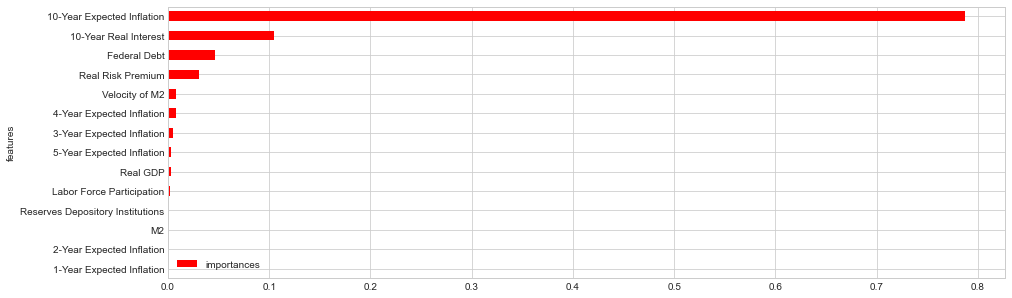

In [10]:
# Derive feature importance from Decision Tree with max_depth 10
importances = reg_tree10.feature_importances_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 2.3 Random Forest

In [11]:
# Create Random Forest model
rf1000 = RandomForestRegressor(n_estimators=1000)
rf1000.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [12]:
print ("Training Set Score R^2: {:.2f}".format(rf1000.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(rf1000.score(X_test, y_test)))

Training Set Score R^2: 1.00
Test Set Score R^2: 0.49


#### 2.3.1 Feature importance

In [13]:
cols = X_train.columns

<AxesSubplot:ylabel='features'>

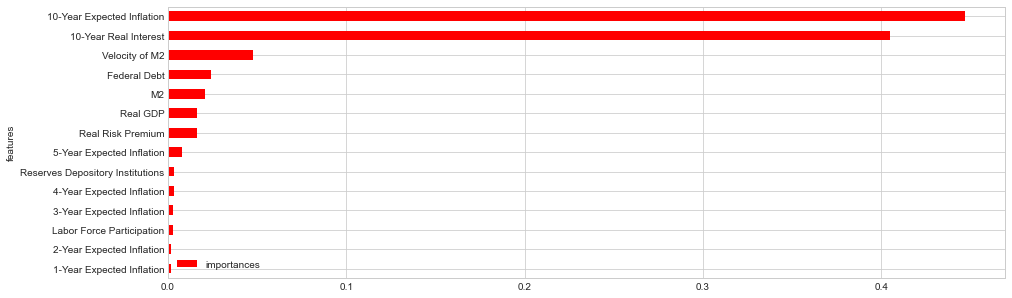

In [14]:
# Derive feature importance from Random Forest wit 1000 trees
importances = rf1000.feature_importances_
std         = np.std([tree.feature_importances_ for tree in rf1000.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]


# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 2.4 Pipeline

In [15]:
# Name of all the models
models = [
    ('Deicison Tree, max_dept10', reg_tree10),
    ('Random Forest, trees=1000', rf1000),]

In [16]:
for name, model in models:
    pipelined_model = Pipeline([ 
                                 (name, model)
                            ])
    
    # Train the model
    pipelined_model.fit(X_train, y_train)

    # Predict the model
    y_hat = pipelined_model.predict(X_test)

    # Calculate metrics
    MAE = mean_absolute_error(y_test, y_hat)
    MSE = mean_squared_error(y_test, y_hat, squared=True)
    RMSE = mean_squared_error(y_test, y_hat, squared=False)
    MAPE = mean_absolute_percentage_error(y_test, y_hat)
    R2_train = pipelined_model.score(X_train, y_train)
    R2_test = r2_score(y_test, y_hat)
    print('Model: ', name, ' | R2 Train: ', R2_train)
    print('Model: ', name, ' | R2 Test: ', R2_test)
    print('Model: ', name, ' | MAE: ', MAE)
    print('Model: ', name, ' | MSE: ', MSE)
    print('Model: ', name, ' | RMSE: ', RMSE)
    print('Model: ', name, ' | MAPE: ', MAPE)
    print('----------------')

Model:  Deicison Tree, max_dept10  | R2 Train:  0.9999828752156509
Model:  Deicison Tree, max_dept10  | R2 Test:  0.4593266371042707
Model:  Deicison Tree, max_dept10  | MAE:  0.5245652173913044
Model:  Deicison Tree, max_dept10  | MSE:  0.3659228260869565
Model:  Deicison Tree, max_dept10  | RMSE:  0.6049155528558978
Model:  Deicison Tree, max_dept10  | MAPE:  0.3929218759088205
----------------
Model:  Random Forest, trees=1000  | R2 Train:  0.9961510355394431
Model:  Random Forest, trees=1000  | R2 Test:  0.4889197495036567
Model:  Random Forest, trees=1000  | MAE:  0.48963608695652566
Model:  Random Forest, trees=1000  | MSE:  0.34589447613478647
Model:  Random Forest, trees=1000  | RMSE:  0.5881279419775823
Model:  Random Forest, trees=1000  | MAPE:  0.4334569426846663
----------------


## <a id='regression_all'></a>
## 3. Prediction with Regression model all features

### 3.1 Create Train & Test set

In [17]:
y = df_forecast['Yield of the ten-year Treasury Notes']
X = df_forecast.drop('Yield of the ten-year Treasury Notes',1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [19]:
print('Number of training data:', len(X_train))
print('Number of test data:', len(X_test))

Number of training data: 180
Number of test data: 46


### 3.2 XGBoost

In [20]:
# Create XGBoost model
xgb_lin = xgb.XGBRegressor(booster='gblinear')
xgb_lin.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=0, reg_lambda=0, ...)

In [21]:
print ("Training Set Score R^2: {:.2f}".format(xgb_lin.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(xgb_lin.score(X_test, y_test)))

Training Set Score R^2: 0.98
Test Set Score R^2: 0.80


#### 3.2.1 Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

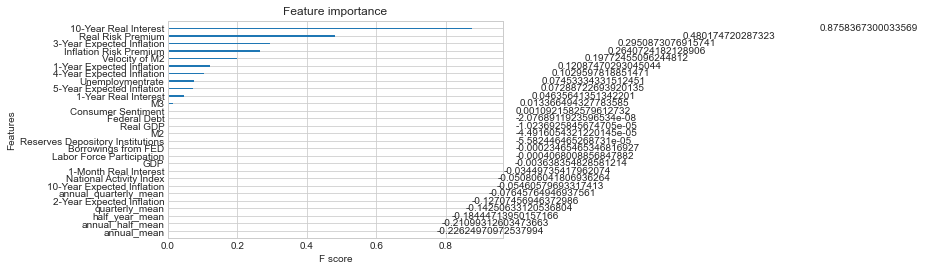

In [22]:
# Linear based importance
xgb.plot_importance(xgb_lin)

### 3.3 Pipeline

In [23]:
# Name of all the models
models = [('XGBOOst, Linear',xgb_lin)]

In [24]:
for name, model in models:
    pipelined_model = Pipeline([ 
                                 (name, model)
                            ])
    
    # Train the model
    pipelined_model.fit(X_train, y_train)

    # Predict the model
    y_hat = pipelined_model.predict(X_test)

    # Calculate metrics
    MAE = mean_absolute_error(y_test, y_hat)
    MSE = mean_squared_error(y_test, y_hat, squared=True)
    RMSE = mean_squared_error(y_test, y_hat, squared=False)
    MAPE = mean_absolute_percentage_error(y_test, y_hat)
    R2_train = pipelined_model.score(X_train, y_train)
    R2_test = r2_score(y_test, y_hat)
    print('Model: ', name, ' | R2 Train: ', R2_train)
    print('Model: ', name, ' | R2 Test: ', R2_test)
    print('Model: ', name, ' | MAE: ', MAE)
    print('Model: ', name, ' | MSE: ', MSE)
    print('Model: ', name, ' | RMSE: ', RMSE)
    print('Model: ', name, ' | MAPE: ', MAPE)
    print('----------------')

Model:  XGBOOst, Linear  | R2 Train:  0.9773769929189623
Model:  XGBOOst, Linear  | R2 Test:  0.9384345624775762
Model:  XGBOOst, Linear  | MAE:  0.16297497207703798
Model:  XGBOOst, Linear  | MSE:  0.04166692948738795
Model:  XGBOOst, Linear  | RMSE:  0.2041247890075773
Model:  XGBOOst, Linear  | MAPE:  0.11569561307536963
----------------
